# <b> XGBoost</b>
___

<b> Table of Content: </b>
<br> <b> [Pipeline_1](#7000) </b>
<br> [1.0 Basic Model: XGBoost](#700100)
<br> [1.1 Balancing the dataset](#700110)
<br> [1.2 Model Tuning](#700112)
<br> [1.3 Cross Validation](#700120)
<br> [1.4 Feature Importance](#700130)
<br>  <b>  [Pipeline 2](#7010) </b>
<br> [2.0 Basic Model: XGBoost](#700200)
<br> [2.1 Balancing the dataset](#700210)
<br> [2.2 Model Tuning](#700220)
<br> [2.3 Cross Validation](#700230)
<br> [2.4 Feature Importance](#700240)
<br>  <b>[Pipeline 3](#7020) </b>
<br> [3.0 Basic Model: XGBoost](#700300)
<br> [3.1 Balancing the dataset](#700310)
<br> [3.2 Model Tuning](#700320)
<br> [3.3 Cross Validation](#700330)
<br> [3.4 Feature Importance](#700340)
<br> <b> [Results](#71000) </b>
___

<b> Loading Required Modules

In [1]:
# import modules
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import graphviz

In [2]:
# import modules
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss 

# Cross Validation packages
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# ROC Curve and AUC
from sklearn.metrics import roc_auc_score

# import module for gridsearch (to find optimal hyper-parameters)
from sklearn.model_selection import GridSearchCV

# for plotting
import matplotlib.pyplot as plt
from sklearn.svm import SVC

import time

/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [3]:
# packages for Receiver Operating Characteristic (ROC) with cross validation
# source: https://scikit-learn.org/0.18/auto_examples/model_selection/plot_roc_crossval.html
print(__doc__)

import numpy as np
from scipy import interp
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_roc_curve

Automatically created module for IPython interactive environment


<a id = "7000"> <h2> Pipeline 1 </h2> </a>
___

<b> read csv file to a pandas dataframe

In [4]:
df_pipeline1 = pd.read_csv("pipeline_1.csv")

<b> show all columns in dataset

In [5]:
print('There are', len(df_pipeline1.columns)-1, 'features, and the target `Revenue` for pipeline 1:')
list(df_pipeline1.columns)

There are 22 features, and the target `Revenue` for pipeline 1:


['Q4',
 'VisitorType_New_Visitor',
 'Q3',
 'TrafficType_2',
 'TrafficType_8',
 'TrafficType_3',
 'PageValues_iqr_yj_zscore',
 'Q1',
 'TrafficType_13',
 'ExitRates_iqr_yj_zscore',
 'OperatingSystems_3',
 'Administrative_Duration_iqr_yj_zscore',
 'TrafficType_1',
 'SpecialDay_0.8',
 'Month_Feb',
 'Browser_6',
 'SpecialDay_0.4',
 'TrafficType_20',
 'Informational_Duration_pp_iqr_yj_zscore',
 'Browser_12',
 'OperatingSystems_7',
 'TrafficType_16',
 'Revenue']

In [6]:
print('Number of rows in the dataset:', df_pipeline1.shape[0])
print('Number of columns in the dataset:', df_pipeline1.shape[1])

Number of rows in the dataset: 12330
Number of columns in the dataset: 23


<a id = "700100"> <h2> 1.0 Basic Model XGBoost </h2> </a>

<b> Define Features and Target variables

In [7]:
X = df_pipeline1.iloc[:, :-1] # Features is all columns in the dataframe except the last column
Y = df_pipeline1.iloc[:, -1] # Target is the last column in the dataframe: 'Revenue'

In [8]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019)

In [9]:
# Train the XGboost Model for Classification
xgb0 = xgb.XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)

# Train the model using the training sets
xgb0.fit(X_train, y_train)

# given a trained model, predict the label of a new set of data.
y_pred = xgb0.predict(X_test)

# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3131
           1       0.68      0.55      0.61       568

    accuracy                           0.89      3699
   macro avg       0.80      0.75      0.77      3699
weighted avg       0.88      0.89      0.89      3699



<b> ROC Curve with AUC score - Basic model </b> (before oversampling)

In [10]:
# define a function to plot the roc_curve and AUC score using variables: X_test and y_test
def roc_curve(X_test=X_test, y_test=y_test, model=xgb0):
    # set the style of the graph
    plt.style.use('Solarize_Light2')

    # predict_proba gives you the probabilities for the target (0 and 1 in your case) in array form in dimension (N,2). 
    # The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1. 
    # we define a variable with an array of the probabilities that each observation belongs to class 1 (with [:,1], where model.predict_proba(X_test)[:,0] refers to the array it belongs to class 0)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    # define false positive rate (fpr) and the true positive rate (tpr)
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    # source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # plot on the X-axis: the false positive rate
    # plot on the Y-axis: the true positive rate
    # with the legend having the auc score
    plt.plot(fpr,tpr,label='AUC = %0.2f' % auc)
    # positioning of the legend
    plt.legend(loc=4)
    # define the title of the plot
    plt.title('Receiver Operating Characteristic (ROC)')
    # define the y axis label
    plt.ylabel('True Positive Rate')
    # define the x axis label
    plt.xlabel('False Positive Rate')
    # plot a straight dashed line in the color red
    plt.plot([0, 1], [0, 1],'r--')
    # show the plot
    plt.show()
    # print out full AUC score
    print('AUC score:', auc)

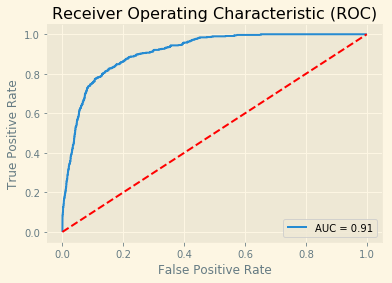

AUC score: 0.912996905097143


In [11]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=xgb0)

<a id = "700110"> <h2> 1.1 Balancing the dataset </h2> </a>
We balance the dataset, because the classes within our target variable 'Revenue' are imbalanced:
* class 0: 84.53%
* class 1: 15.47%

The XGBClassifier has a hyper-parameter: "scale_pos_weight" (Balancing of positive and negative weights) to weight the positive minority class (class 1) to the negative majority class (class 0)
<br> In our dataset the ratio is 1 (class 1) to every 5.46 in the majority class (class 0) 
<br> So we can set our "scale_pos_weight" to a float of 5.462264150943396. The calculation can be seen below.

In [12]:
# scale_pos_weight = count(negative examples)/count(Positive examples)
# in percentages you would get the same number: 84.53/15.47
scale_pos_weight = Y[Y==0].count()/Y[Y==1].count()
scale_pos_weight

5.462264150943396

We set our "scale_pos_weight" and evaluate with the weighted f1-score.

In [13]:
# Train the XGboost Model for Classification
xgb1 = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, learning_rate = 0.05, n_estimators=300, max_depth=5)

# Train the model using the training sets
xgb1.fit(X_train, y_train)

# given a trained model, predict the label of a new set of data.
y_pred = xgb0.predict(X_test)

# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3131
           1       0.68      0.55      0.61       568

    accuracy                           0.89      3699
   macro avg       0.80      0.75      0.77      3699
weighted avg       0.88      0.89      0.89      3699



_Note:_ The weighted f1 score did not change after applying the scale_pos_weight and is still 0.89.

<b> Cross Validation on X and Y

In [14]:
# define evaluation procedure
k_fold_split = 10
cv = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
# evaluate model
result = cross_val_score(xgb1, X, Y, cv=cv, scoring='accuracy')
result_f1_weighted = cross_val_score(xgb1, X, Y, cv=cv, scoring='f1_weighted')
result_auc = cross_val_score(xgb1, X, Y, cv=cv, scoring='roc_auc')

print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted.mean(), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC score results:')
print('--------------------------------------------------------------------------')
print(result_auc, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print('avg AUC score', result_auc.mean())

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.86436599 0.87772582 0.88120137 0.88303299 0.88347279 0.88861316
 0.88795683 0.86623206 0.88427534 0.88352989] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8800406254511405 

--------------------------------------------------------------------------
All the AUC score results:
--------------------------------------------------------------------------
[0.90680997 0.91279742 0.91765247 0.92543402 0.91993519 0.92986125
 0.93612223 0.91191641 0.91622697 0.92731848] 

--------------------------------------------------------------------------
Average of all the AUC score results:
--------------------------------------------------------------------------
avg AUC score 0

<a id = "700112"> <h2> 1.2 Model Tuning </h2> </a>

In [15]:
# define grid
# source: https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [16]:
# set the start time
start = time.time()

# define evaluation procedure
# define cross validation method as KFold
k_fold_split = 10
cv = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

# Create a grid search object
grid = GridSearchCV(estimator=xgb1, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

# Fit the grid search (Fitting your model to the training data)
grid_result = grid.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# get the time it takes for the gridsearch to run
# source: https://blog.softhints.com/python-test-performance-and-measure-time-elapsed-in-seconds/
# set the end time
end = time.time()

# get the elapsed execution time
execution_time = end - start
print("--- Execution time: ---")
print ('--- %0.3fms. --- ' % ( execution_time*1000.))
print("--- %s seconds ---" % (execution_time))
print("--- %s minutes ---" % (execution_time/60))

Best: 0.926779 using {'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 1.0}
--- Execution time: ---
--- 3007898.688ms. --- 
--- 3007.8986876010895 seconds ---
--- 50.13164479335149 minutes ---


Best: 0.926779 using {'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 1.0}
<br> --- Execution time: ---
<br> --- 2720346.076ms. --- 
<br> --- 2720.346075773239 seconds ---
<br> --- 45.33910126288732 minutes ---

Apply optimal hyperparameters and train the model and test it again.

In [17]:
# Train the XGboost Model for Classification
xgb2 = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, 
                         learning_rate = 0.05, 
                         n_estimators=300, 
                         min_child_weight = 1,
                         gamma = 5,
                         subsample = 1,
                         colsample_bytree = 1,
                         max_depth= 4)

# Train the model using the training sets
xgb2.fit(X_train, y_train)

# given a trained model, predict the label of a new set of data.
y_pred = xgb0.predict(X_test)

# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3131
           1       0.68      0.55      0.61       568

    accuracy                           0.89      3699
   macro avg       0.80      0.75      0.77      3699
weighted avg       0.88      0.89      0.89      3699



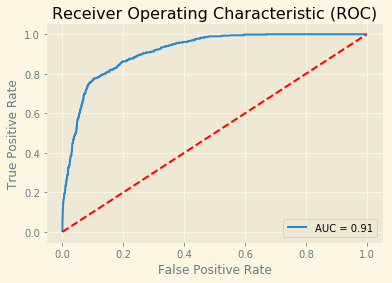

AUC score: 0.9135822600887984


In [18]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=xgb2)

<a id = "700120"> <h2> 1.3 Cross Validation </h2> </a>

In [19]:
# define evaluation procedure
k_fold_split = 10
cv = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
# evaluate model
result = cross_val_score(xgb2, X, Y, cv=cv, scoring='accuracy')
result_f1_weighted = cross_val_score(xgb2, X, Y, cv=cv, scoring='f1_weighted')
result_auc = cross_val_score(xgb2, X, Y, cv=cv, scoring='roc_auc')

print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC score results:')
print('--------------------------------------------------------------------------')
print(result_auc, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print('avg AUC score', result_auc.mean())

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.86467997 0.88090757 0.88221223 0.88069853 0.8858516  0.8863854
 0.89028023 0.86840567 0.87598576 0.8864023 ] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8802 

--------------------------------------------------------------------------
All the AUC score results:
--------------------------------------------------------------------------
[0.90930719 0.91555045 0.92187803 0.93164666 0.92176884 0.93324737
 0.93881725 0.91301319 0.9191369  0.93429295] 

--------------------------------------------------------------------------
Average of all the AUC score results:
--------------------------------------------------------------------------
avg AUC score 0.923865882210

<a id = "700130"> <h2> 1.4 Feature Importance </h2> </a>

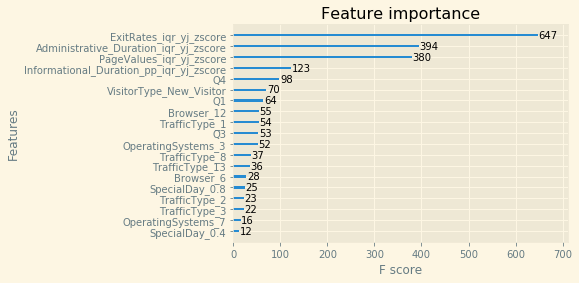

In [20]:
# source: https://towardsdatascience.com/exploring-xgboost-4baf9ace0cf6
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(xgb2)
plt.show()

<a id = "7010"> <h2> Pipeline 2 </h2> </a>
___

<b> read csv file to a pandas dataframe

In [21]:
df_pipeline2 = pd.read_csv("pipeline_2.csv")

<b> show all columns in dataset

In [22]:
print('There are', len(df_pipeline2.columns)-1, 'features, and the target `Revenue` for pipeline 2:')
list(df_pipeline2.columns)

There are 21 features, and the target `Revenue` for pipeline 2:


['TrafficType_15',
 'Month_Nov',
 'Administrative_Duration_mm_yj_stdev',
 'VisitorType_New_Visitor',
 'Informational_mm_yj_stdev',
 'TrafficType_2',
 'TrafficType_3',
 'ProductRelated_mm_yj_stdev',
 'PageValues_mm_yj_stdev',
 'Month_May',
 'TrafficType_13',
 'OperatingSystems_3',
 'TrafficType_1',
 'add_exit_bounce_rates_mm_yj_stdev',
 'Month_Mar',
 'TrafficType_18',
 'TrafficType_8',
 'SpecialDay_0.8',
 'Month_Feb',
 'TrafficType_12',
 'Browser_12',
 'Revenue']

In [23]:
print('Number of rows in the dataset:', df_pipeline2.shape[0])
print('Number of columns in the dataset:', df_pipeline2.shape[1])

Number of rows in the dataset: 12330
Number of columns in the dataset: 22


<a id = "700200"> <h2> 2.0 Basic Model XGBoost </h2> </a>

<b> Define Features and Target variables

In [24]:
X = df_pipeline2.iloc[:, :-1] # Features is all columns in the dataframe except the last column
Y = df_pipeline2.iloc[:, -1] # Target is the last column in the dataframe: 'Revenue'

In [25]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019)

In [26]:
# Train the XGboost Model for Classification
xgb0 = xgb.XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)

# Train the model using the training sets
xgb0.fit(X_train, y_train)

# given a trained model, predict the label of a new set of data.
y_pred = xgb0.predict(X_test)

# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3131
           1       0.67      0.58      0.63       568

    accuracy                           0.89      3699
   macro avg       0.80      0.77      0.78      3699
weighted avg       0.89      0.89      0.89      3699



<b> ROC Curve with AUC score - Basic model </b> (before oversampling)

In [27]:
# define a function to plot the roc_curve and AUC score using variables: X_test and y_test
def roc_curve(X_test=X_test, y_test=y_test, model=xgb0):
    # set the style of the graph
    plt.style.use('Solarize_Light2')

    # predict_proba gives you the probabilities for the target (0 and 1 in your case) in array form in dimension (N,2). 
    # The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1. 
    # we define a variable with an array of the probabilities that each observation belongs to class 1 (with [:,1], where model.predict_proba(X_test)[:,0] refers to the array it belongs to class 0)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    # define false positive rate (fpr) and the true positive rate (tpr)
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    # source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # plot on the X-axis: the false positive rate
    # plot on the Y-axis: the true positive rate
    # with the legend having the auc score
    plt.plot(fpr,tpr,label='AUC = %0.2f' % auc)
    # positioning of the legend
    plt.legend(loc=4)
    # define the title of the plot
    plt.title('Receiver Operating Characteristic (ROC)')
    # define the y axis label
    plt.ylabel('True Positive Rate')
    # define the x axis label
    plt.xlabel('False Positive Rate')
    # plot a straight dashed line in the color red
    plt.plot([0, 1], [0, 1],'r--')
    # show the plot
    plt.show()
    # print out full AUC score
    print('AUC score:', auc)

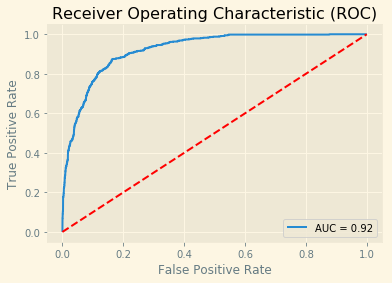

AUC score: 0.922143568854841


In [28]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=xgb0)

<a id = "700210"> <h2> 2.1 Balancing the dataset </h2> </a>
We balance the dataset, because the classes within our target variable 'Revenue' are imbalanced:
* class 0: 84.53%
* class 1: 15.47%

The XGBClassifier has a hyper-parameter: "scale_pos_weight" (Balancing of positive and negative weights) to weight the positive minority class (class 1) to the negative majority class (class 0)
<br> In our dataset the ratio is 1 (class 1) to every 5.46 in the majority class (class 0) 
<br> So we can set our "scale_pos_weight" to a float of 5.462264150943396. The calculation can be seen below.

In [29]:
# scale_pos_weight = count(negative examples)/count(Positive examples)
# in percentages you would get the same number: 84.53/15.47
scale_pos_weight = Y[Y==0].count()/Y[Y==1].count()
scale_pos_weight

5.462264150943396

We set our "scale_pos_weight" and evaluate with the weighted f1-score.

In [30]:
# Train the XGboost Model for Classification
xgb1 = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, learning_rate = 0.05, n_estimators=300, max_depth=5)

# Train the model using the training sets
xgb1.fit(X_train, y_train)

# given a trained model, predict the label of a new set of data.
y_pred = xgb0.predict(X_test)

# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3131
           1       0.67      0.58      0.63       568

    accuracy                           0.89      3699
   macro avg       0.80      0.77      0.78      3699
weighted avg       0.89      0.89      0.89      3699



_Note:_ The weighted f1 score did not change after applying the scale_pos_weight and is still 0.89.

<b> Cross Validation on X and Y

In [31]:
# define evaluation procedure
k_fold_split = 10
cv = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
# evaluate model
result = cross_val_score(xgb1, X, Y, cv=cv, scoring='accuracy')
result_f1_weighted = cross_val_score(xgb1, X, Y, cv=cv, scoring='f1_weighted')
result_auc = cross_val_score(xgb1, X, Y, cv=cv, scoring='roc_auc')

print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted.mean(), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC score results:')
print('--------------------------------------------------------------------------')
print(result_auc, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print('avg AUC score', result_auc.mean())

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.86528275 0.86956526 0.87957975 0.88056651 0.88510306 0.87796087
 0.88155741 0.86856696 0.87644687 0.88118606] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.876581550208171 

--------------------------------------------------------------------------
All the AUC score results:
--------------------------------------------------------------------------
[0.9167542  0.91628409 0.92701597 0.94037735 0.92676479 0.93254075
 0.94747789 0.9205474  0.93526012 0.94036683] 

--------------------------------------------------------------------------
Average of all the AUC score results:
--------------------------------------------------------------------------
avg AUC score 0.

<a id = "700220"> <h2> 2.2 Model Tuning </h2> </a>

In [32]:
# define grid
# source: https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost
param_grid = {
        'min_child_weight': [1],
        'gamma': [5, 6, 7],
        'subsample': [1.0],
        'colsample_bytree': [1.0, 1.5],
        'max_depth': [3, 4, 5]
        }

# pipeline 1 notes
# {'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 1.0} 

In [33]:
# set the start time
start = time.time()

# define evaluation procedure
# define cross validation method as KFold
k_fold_split = 10
cv = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

# Create a grid search object
grid = GridSearchCV(estimator=xgb1, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

# Fit the grid search (Fitting your model to the training data)
grid_result = grid.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# get the time it takes for the gridsearch to run
# source: https://blog.softhints.com/python-test-performance-and-measure-time-elapsed-in-seconds/
# set the end time
end = time.time()

# get the elapsed execution time
execution_time = end - start
print("--- Execution time: ---")
print ('--- %0.3fms. --- ' % ( execution_time*1000.))
print("--- %s seconds ---" % (execution_time))
print("--- %s minutes ---" % (execution_time/60))

Best: 0.936844 using {'colsample_bytree': 1.0, 'gamma': 6, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 1.0}
--- Execution time: ---
--- 96805.182ms. --- 
--- 96.80518221855164 seconds ---
--- 1.6134197036425273 minutes ---


Best: 0.926779 using {'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 1.0}
<br> --- Execution time: ---
<br> --- 2720346.076ms. --- 
<br> --- 2720.346075773239 seconds ---
<br> --- 45.33910126288732 minutes ---

Apply optimal hyperparameters and train the model and test it again.

In [34]:
# Train the XGboost Model for Classification
xgb2 = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, 
                         learning_rate = 0.05, 
                         n_estimators=300, 
                         min_child_weight = 1,
                         gamma = 5,
                         subsample = 1,
                         colsample_bytree = 1,
                         max_depth= 4)

# Train the model using the training sets
xgb2.fit(X_train, y_train)

# given a trained model, predict the label of a new set of data.
y_pred = xgb0.predict(X_test)

# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3131
           1       0.67      0.58      0.63       568

    accuracy                           0.89      3699
   macro avg       0.80      0.77      0.78      3699
weighted avg       0.89      0.89      0.89      3699



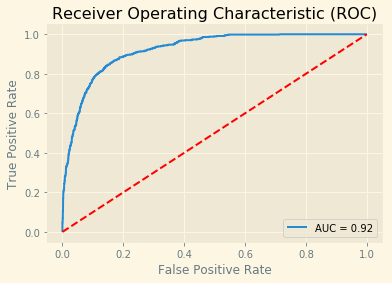

AUC score: 0.9215908273017215


In [35]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=xgb2)

<a id = "700230"> <h2> 2.3 Cross Validation </h2> </a>

In [36]:
# define evaluation procedure
k_fold_split = 10
cv = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
# evaluate model
result = cross_val_score(xgb2, X, Y, cv=cv, scoring='accuracy')
result_f1_weighted = cross_val_score(xgb2, X, Y, cv=cv, scoring='f1_weighted')
result_auc = cross_val_score(xgb2, X, Y, cv=cv, scoring='roc_auc')

print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC score results:')
print('--------------------------------------------------------------------------')
print(result_auc, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print('avg AUC score', result_auc.mean())

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.85899216 0.87104999 0.88031287 0.87358792 0.88127734 0.87513774
 0.88139613 0.85878594 0.87261835 0.87566762] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8729 

--------------------------------------------------------------------------
All the AUC score results:
--------------------------------------------------------------------------
[0.91806451 0.92177483 0.9288819  0.94284519 0.92822846 0.93624407
 0.94966405 0.92265945 0.93490193 0.94487972] 

--------------------------------------------------------------------------
Average of all the AUC score results:
--------------------------------------------------------------------------
avg AUC score 0.93281441133

<a id = "700240"> <h2> 2.4 Feature Importance </h2> </a>

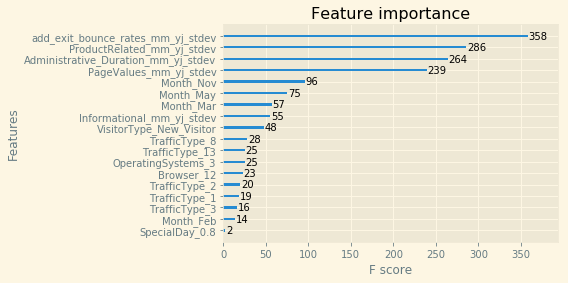

In [37]:
# source: https://towardsdatascience.com/exploring-xgboost-4baf9ace0cf6
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(xgb2)
plt.show()

<a id = "7020"> <h2> Pipeline 3 </h2> </a>
___

<b> read csv file to a pandas dataframe

In [38]:
df_pipeline3 = pd.read_csv("pipeline_3.csv")

<b> show all columns in dataset

In [39]:
print('There are', len(df_pipeline3.columns)-1, 'features, and the target `Revenue` for pipeline 3:')
list(df_pipeline3.columns)

There are 23 features, and the target `Revenue` for pipeline 3:


['Administrative_yj_stdev_zscore',
 'Month_Nov',
 'VisitorType_New_Visitor',
 'TrafficType_2',
 'Month_May',
 'TrafficType_3',
 'add_exit_bounce_rates_yj_stdev_zscore',
 'TrafficType_13',
 'PageValues_yj_stdev_zscore',
 'OperatingSystems_3',
 'TrafficType_1',
 'Month_Mar',
 'TrafficType_8',
 'SpecialDay_0.8',
 'Month_Feb',
 'Month_Dec',
 'SpecialDay_0.4',
 'TrafficType_20',
 'Month_Oct',
 'Region_1',
 'Browser_12',
 'OperatingSystems_7',
 'TrafficType_16',
 'Revenue']

In [40]:
print('Number of rows in the dataset:', df_pipeline3.shape[0])
print('Number of columns in the dataset:', df_pipeline3.shape[1])

Number of rows in the dataset: 12330
Number of columns in the dataset: 24


<a id = "700300"> <h2> 3.0 Basic Model XGBoost </h2> </a>

<b> Define Features and Target variables

In [41]:
X = df_pipeline3.iloc[:, :-1] # Features is all columns in the dataframe except the last column
Y = df_pipeline3.iloc[:, -1] # Target is the last column in the dataframe: 'Revenue'

In [42]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019)

In [43]:
# Train the XGboost Model for Classification
xgb0 = xgb.XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)

# Train the model using the training sets
xgb0.fit(X_train, y_train)

# given a trained model, predict the label of a new set of data.
y_pred = xgb0.predict(X_test)

# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3131
           1       0.68      0.57      0.62       568

    accuracy                           0.89      3699
   macro avg       0.80      0.76      0.78      3699
weighted avg       0.89      0.89      0.89      3699



<b> ROC Curve with AUC score - Basic model </b> (before oversampling)

In [44]:
# define a function to plot the roc_curve and AUC score using variables: X_test and y_test
def roc_curve(X_test=X_test, y_test=y_test, model=xgb0):
    # set the style of the graph
    plt.style.use('Solarize_Light2')

    # predict_proba gives you the probabilities for the target (0 and 1 in your case) in array form in dimension (N,2). 
    # The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1. 
    # we define a variable with an array of the probabilities that each observation belongs to class 1 (with [:,1], where model.predict_proba(X_test)[:,0] refers to the array it belongs to class 0)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    # define false positive rate (fpr) and the true positive rate (tpr)
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    # source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # plot on the X-axis: the false positive rate
    # plot on the Y-axis: the true positive rate
    # with the legend having the auc score
    plt.plot(fpr,tpr,label='AUC = %0.2f' % auc)
    # positioning of the legend
    plt.legend(loc=4)
    # define the title of the plot
    plt.title('Receiver Operating Characteristic (ROC)')
    # define the y axis label
    plt.ylabel('True Positive Rate')
    # define the x axis label
    plt.xlabel('False Positive Rate')
    # plot a straight dashed line in the color red
    plt.plot([0, 1], [0, 1],'r--')
    # show the plot
    plt.show()
    # print out full AUC score
    print('AUC score:', auc)

<b> Cross validation on X and Y

###### Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

result_accuracy = cross_val_score(svc_model3, X, Y, cv=kfold, scoring='accuracy')
result_f1_weighted = cross_val_score(svc_model3, X, Y, cv=kfold, scoring='f1_weighted')
result_auc = cross_val_score(svc_model3, X, Y, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('Average of all the accuracy results:')
print('--------------------------------------------------------------------------')
print(round(result_accuracy.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print(round(result_auc.mean(), 4))

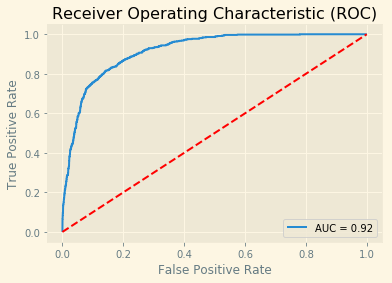

AUC score: 0.9169411631076785


In [45]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=xgb0)

<a id = "700310"> <h2> 3.1 Balancing the dataset </h2> </a>
We balance the dataset, because the classes within our target variable 'Revenue' are imbalanced:
* class 0: 84.53%
* class 1: 15.47%

The XGBClassifier has a hyper-parameter: "scale_pos_weight" (Balancing of positive and negative weights) to weight the positive minority class (class 1) to the negative majority class (class 0)
<br> In our dataset the ratio is 1 (class 1) to every 5.46 in the majority class (class 0) 
<br> So we can set our "scale_pos_weight" to a float of 5.462264150943396. The calculation can be seen below.

In [46]:
# scale_pos_weight = count(negative examples)/count(Positive examples)
# in percentages you would get the same number: 84.53/15.47
scale_pos_weight = Y[Y==0].count()/Y[Y==1].count()
scale_pos_weight

5.462264150943396

We set our "scale_pos_weight" and evaluate with the weighted f1-score.

In [47]:
# Train the XGboost Model for Classification
xgb1 = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, learning_rate = 0.05, n_estimators=300, max_depth=5)

# Train the model using the training sets
xgb1.fit(X_train, y_train)

# given a trained model, predict the label of a new set of data.
y_pred = xgb0.predict(X_test)

# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3131
           1       0.68      0.57      0.62       568

    accuracy                           0.89      3699
   macro avg       0.80      0.76      0.78      3699
weighted avg       0.89      0.89      0.89      3699



_Note:_ The weighted f1 score did not change after applying the scale_pos_weight and is still 0.89.

<b> Cross Validation on X and Y

In [48]:
# define evaluation procedure
k_fold_split = 10
cv = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
# evaluate model
result = cross_val_score(xgb1, X, Y, cv=cv, scoring='accuracy')
result_f1_weighted = cross_val_score(xgb1, X, Y, cv=cv, scoring='f1_weighted')
result_auc = cross_val_score(xgb1, X, Y, cv=cv, scoring='roc_auc')

print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC score results:')
print('--------------------------------------------------------------------------')
print(result_auc, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print('avg AUC score', result_auc.mean())

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.85477461 0.86723002 0.87164703 0.86696208 0.87008544 0.86191589
 0.87735984 0.85787837 0.86836723 0.8755782 ] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8672 

--------------------------------------------------------------------------
All the AUC score results:
--------------------------------------------------------------------------
[0.91707455 0.91249578 0.92277348 0.93189775 0.9305077  0.92824943
 0.94465688 0.91533521 0.93150536 0.93684208] 

--------------------------------------------------------------------------
Average of all the AUC score results:
--------------------------------------------------------------------------
avg AUC score 0.92713382227

<a id = "700320"> <h2> 3.2 Model Tuning </h2> </a>

In [49]:
# define grid
# source: https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [50]:
# set the start time
start = time.time()

# define evaluation procedure
# define cross validation method as KFold
k_fold_split = 10
cv = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

# Create a grid search object
grid = GridSearchCV(estimator=xgb1, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

# Fit the grid search (Fitting your model to the training data)
grid_result = grid.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# get the time it takes for the gridsearch to run
# source: https://blog.softhints.com/python-test-performance-and-measure-time-elapsed-in-seconds/
# set the end time
end = time.time()

# get the elapsed execution time
execution_time = end - start
print("--- Execution time: ---")
print ('--- %0.3fms. --- ' % ( execution_time*1000.))
print("--- %s seconds ---" % (execution_time))
print("--- %s minutes ---" % (execution_time/60))

Best: 0.935843 using {'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 4, 'min_child_weight': 5, 'subsample': 1.0}
--- Execution time: ---
--- 3745817.828ms. --- 
--- 3745.8178277015686 seconds ---
--- 62.43029712835948 minutes ---


Best: 0.926779 using {'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 1.0}
<br> --- Execution time: ---
<br> --- 2720346.076ms. --- 
<br> --- 2720.346075773239 seconds ---
<br> --- 45.33910126288732 minutes ---

Apply optimal hyperparameters and train the model and test it again.

In [51]:
# Train the XGboost Model for Classification
xgb2 = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, 
                         learning_rate = 0.05, 
                         n_estimators=300, 
                         min_child_weight = 1,
                         gamma = 5,
                         subsample = 1,
                         colsample_bytree = 1,
                         max_depth= 4)

# Train the model using the training sets
xgb2.fit(X_train, y_train)

# given a trained model, predict the label of a new set of data.
y_pred = xgb0.predict(X_test)

# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3131
           1       0.68      0.57      0.62       568

    accuracy                           0.89      3699
   macro avg       0.80      0.76      0.78      3699
weighted avg       0.89      0.89      0.89      3699



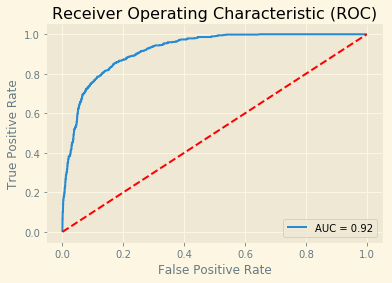

AUC score: 0.920507555071727


In [52]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=xgb2)

<a id = "700330"> <h2> 3.3 Cross Validation </h2> </a>

In [53]:
# define evaluation procedure
k_fold_split = 10
cv = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
# evaluate model
result = cross_val_score(xgb2, X, Y, cv=cv, scoring='accuracy')
result_f1_weighted = cross_val_score(xgb2, X, Y, cv=cv, scoring='f1_weighted')
result_auc = cross_val_score(xgb2, X, Y, cv=cv, scoring='roc_auc')

print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted.mean(), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC score results:')
print('--------------------------------------------------------------------------')
print(result_auc, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print('avg AUC score', result_auc.mean())

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.85519314 0.86440736 0.86676338 0.86366473 0.87221827 0.86634639
 0.86966077 0.85767536 0.862123   0.87337893] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8651431352879608 

--------------------------------------------------------------------------
All the AUC score results:
--------------------------------------------------------------------------
[0.91951138 0.916803   0.92554211 0.93956909 0.93174993 0.93522024
 0.94648733 0.91807223 0.93291586 0.94461455] 

--------------------------------------------------------------------------
Average of all the AUC score results:
--------------------------------------------------------------------------
avg AUC score 0

<a id = "700340"> <h2> 3.4 Feature Importance </h2> </a>

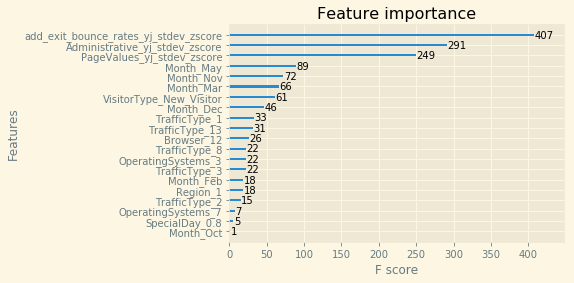

In [54]:
# source: https://towardsdatascience.com/exploring-xgboost-4baf9ace0cf6
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(xgb2)
plt.show()

<a id = "71000"> <h2> Results </h2> </a>
___

<b> Left align all markdown tables

In [55]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

### Pipeline 1 Results </b>
_Note:_ tool used for Excel table to markdown conversion, namely: https://tableconvert.com/

<b> Take-away: </b> 

### Pipeline 2 Results </b>

<b> Take-away: </b> 

### Pipeline 3 Results </b>

<b> Take-away: </b> 

<b> Conclusion: </b> 
